In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import requests
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [5]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

source = requests.get(url).text

poll_data = StringIO(source) 

In [6]:
poll_df = pd.read_csv(poll_data)

poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [7]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


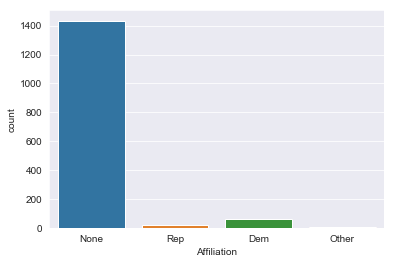

In [8]:
sns.countplot('Affiliation',data=poll_df)

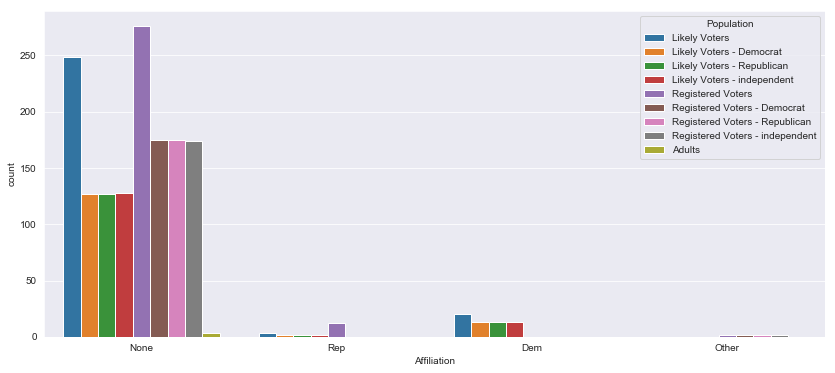

In [12]:
plt.subplots(figsize=(14,6))
sns.countplot('Affiliation',data=poll_df,hue='Population')

Averages for Trump and Clinton and undecided people

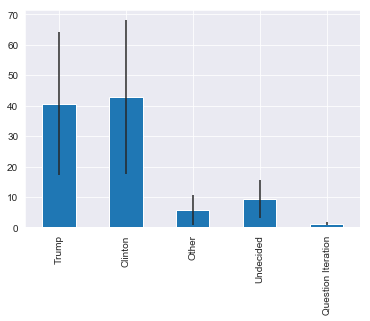

In [13]:
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)

std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

avg.plot(yerr=std,kind='bar',legend=False)

In [16]:
poll_avg = pd.concat([avg,std],axis=1)

poll_avg.columns = ['Average','STD']

poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118
Question Iteration,1.216820,0.412214


Time series analysis of the voter sentiment for Trump/ Clinton favours vs the poll end dates. 

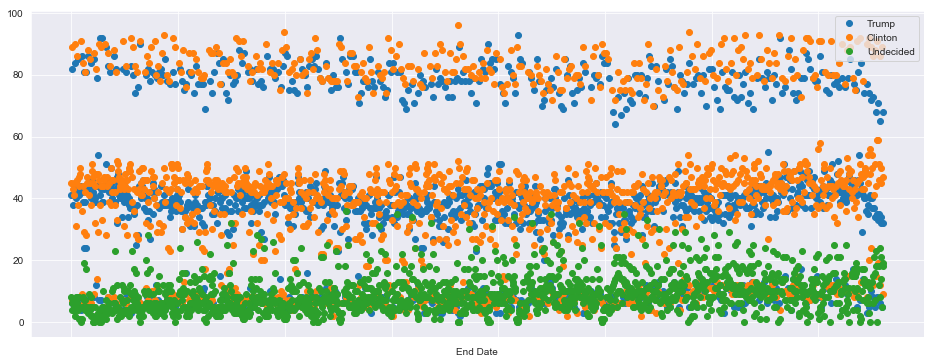

In [27]:
poll_df.plot(x='End Date',y=['Trump','Clinton','Undecided'],marker='o',linestyle='', figsize=(16,6))

In [28]:
from datetime import datetime

In [29]:
poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


In [30]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


Since we calculated the difference Trump minus Clinton, thus the positive diference indicates a leaning towards Trump in polls

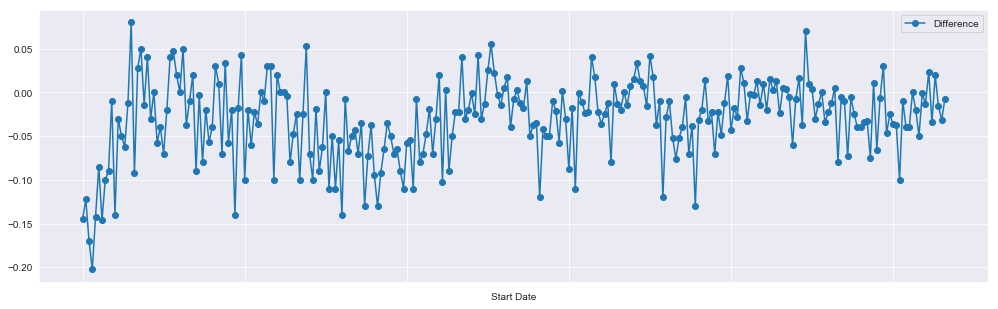

In [34]:
fig = poll_df.plot('Start Date','Difference',figsize=(17,5),marker='o',linestyle='-')

Finding people's sentiment after each Presidential debates. 

The dates are: Sep 26, Oct 9 & Oct 19 2016

https://en.wikipedia.org/wiki/2016_United_States_presidential_debates

In [63]:
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2016-09' or date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))

209
262


In [69]:
print(poll_df['Start Date'][209+18])
print(poll_df['Start Date'][209+31])
print(poll_df['Start Date'][209+41])

2016-09-26
2016-10-09
2016-10-19


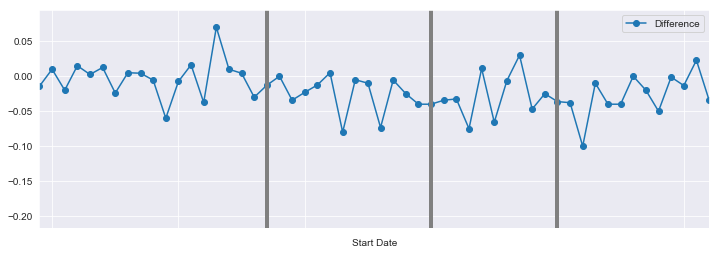

In [94]:
# Start with original figure
fig = poll_df.plot('Start Date','Difference', figsize=(12,4),marker='o',linestyle='-',xlim=(209,262))
# Now add the debate markers
plt.axvline(x=209+18, linewidth=4, color='grey')
plt.axvline(x=209+31, linewidth=4, color='grey')
plt.axvline(x=209+41, linewidth=4, color='grey')


per above plot, the polls favours Clinton most of the time as she performed well in debates. having said that, Towards election, the poll favoured Trump.

For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election.